In [8]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt


In [9]:
df = pd.read_csv("data/train.csv",
                 usecols=["SalePrice","GrLivArea","BedroomAbvGr","FullBath","HalfBath"])

In [10]:
import numpy as np
df["TotalBath"] = df["FullBath"] + 0.5 * df["HalfBath"]

df["LogPrice"] = np.log1p(df["SalePrice"])
df["LogArea"]  = np.log1p(df["GrLivArea"])

X = df[["LogArea", "BedroomAbvGr", "TotalBath"]]
y = df["LogPrice"]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42)

print(X_train.shape, X_test.shape)

(1168, 3) (292, 3)


Baseline RMSE (log-space): 0.2618
R²: 0.633
≈ $0 average error


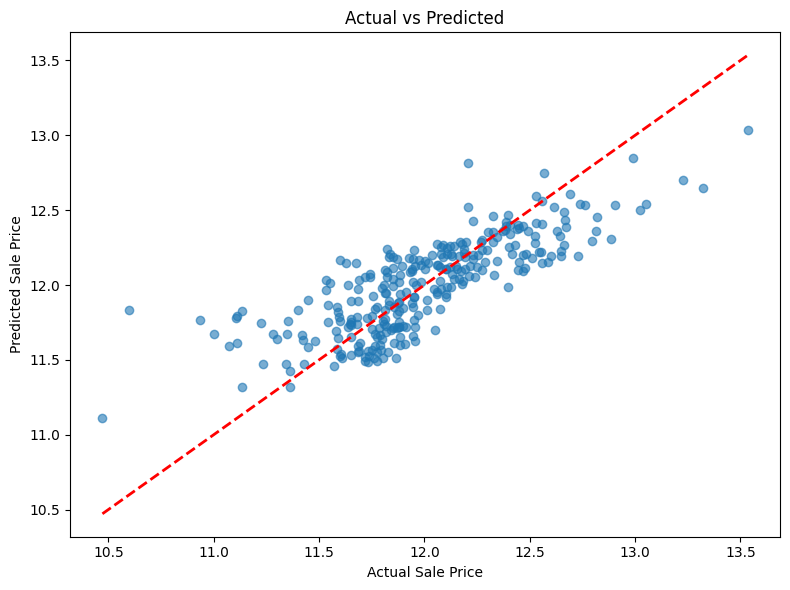

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
pred = lr.predict(X_test)

from sklearn.metrics import root_mean_squared_error, r2_score

rmse = root_mean_squared_error(y_test, pred)
print(f"Baseline RMSE (log-space): {rmse:.4f}")
print(f"R²: {r2_score(y_test, pred):.3f}")
print("≈ ${:,.0f} average error".format(np.expm1(rmse)))

y_pred = pred


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
lims = [min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred))]
plt.plot(lims, lims, 'r--', linewidth=2)       # 45° line
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted")
plt.tight_layout()
plt.show()


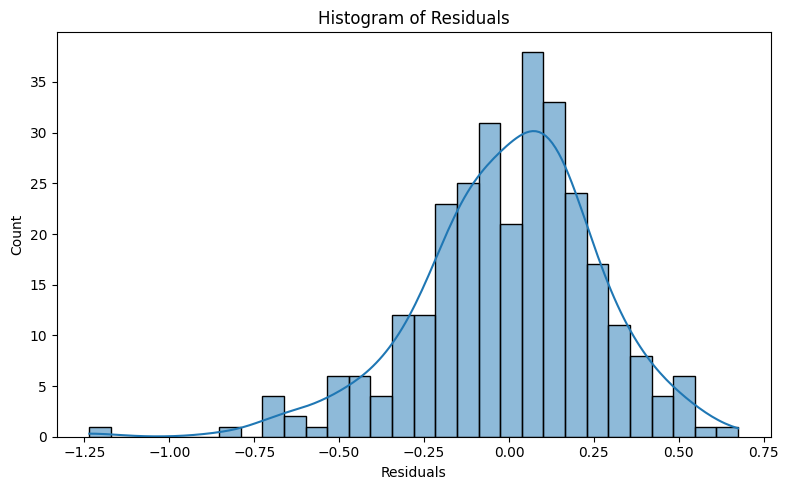

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.tight_layout()
plt.show()

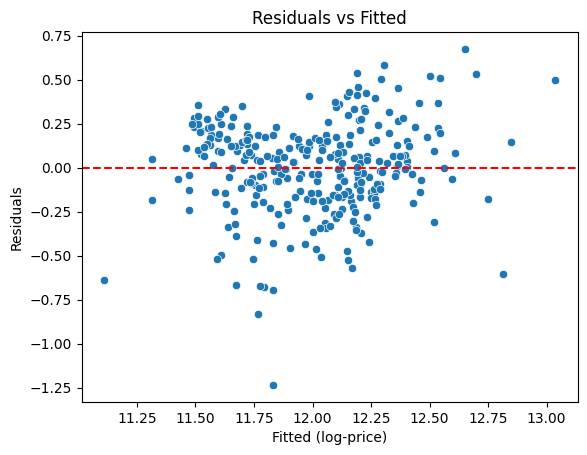

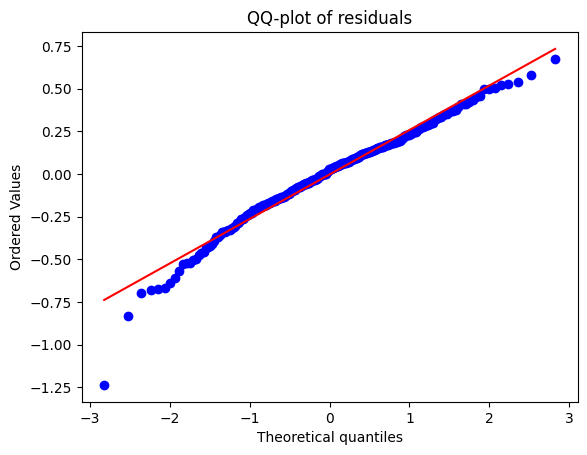

In [6]:
import seaborn as sns, matplotlib.pyplot as plt, scipy.stats as stats
residuals = y_test - pred

sns.scatterplot(x=pred, y=residuals)
plt.axhline(0, ls="--", color="red")
plt.xlabel("Fitted (log-price)"); plt.ylabel("Residuals")
plt.title("Residuals vs Fitted"); plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-plot of residuals"); plt.show()

In [13]:
import joblib, pathlib, os
MODEL_DIR = pathlib.Path("../models")
MODEL_DIR.mkdir(exist_ok=True)

joblib.dump(lr, MODEL_DIR / "linear.joblib")



['..\\models\\linear.joblib']